In [1]:
# Importing useful packages
import numpy as np
from scipy import stats
import pandas as pd
import sklearn as sk
import seaborn as sb
import datetime as dt
import pylab 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# from new_var import calc,y1function,y2function,C3function,C6function
# from outliers import outlier
# from Standardising import standard
#from Recoding_SIC_Codes import Industry_Division
%matplotlib inline
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support


# Read in Data file and define NaN values
housetrain = pd.read_csv("train.csv",header=0,na_values='None')
housetrain.MSSubClass = housetrain.MSSubClass.astype(str)

C:\Users\conor\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\conor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Data describe
pd.set_option('display.max_columns', 500)
print(housetrain.describe())

                Id  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    70.049958   10516.828082     6.099315     5.575342   
std     421.610009    24.284752    9981.264932     1.382997     1.112799   
min       1.000000    21.000000    1300.000000     1.000000     1.000000   
25%     365.750000    59.000000    7553.500000     5.000000     5.000000   
50%     730.500000    69.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    80.000000   11601.500000     7.000000     6.000000   
max    1460.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000

In [3]:
# Get numeric value to missing features
for i in range(len(housetrain.columns)):
    j = housetrain.columns[i]
    miss=((1460-housetrain[str(j)].count())/1460)*100
    print("The missingness of variable {}".format(j))
    print("{0:.2f}%".format(miss))

The missingness of variable Id
0.00%
The missingness of variable MSSubClass
0.00%
The missingness of variable MSZoning
0.00%
The missingness of variable LotFrontage
17.74%
The missingness of variable LotArea
0.00%
The missingness of variable Street
0.00%
The missingness of variable Alley
93.77%
The missingness of variable LotShape
0.00%
The missingness of variable LandContour
0.00%
The missingness of variable Utilities
0.00%
The missingness of variable LotConfig
0.00%
The missingness of variable LandSlope
0.00%
The missingness of variable Neighborhood
0.00%
The missingness of variable Condition1
0.00%
The missingness of variable Condition2
0.00%
The missingness of variable BldgType
0.00%
The missingness of variable HouseStyle
0.00%
The missingness of variable OverallQual
0.00%
The missingness of variable OverallCond
0.00%
The missingness of variable YearBuilt
0.00%
The missingness of variable YearRemodAdd
0.00%
The missingness of variable RoofStyle
0.00%
The missingness of variable Roo

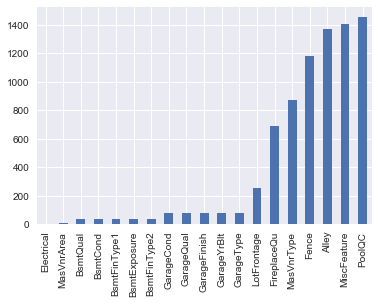

In [4]:
missing = housetrain.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [5]:
# Alley : data description says NA means "no alley access"
housetrain.loc[:, "Alley"] = housetrain.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
housetrain.loc[:, "BedroomAbvGr"] = housetrain.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
housetrain.loc[:, "BsmtQual"] = housetrain.loc[:, "BsmtQual"].fillna("No")
housetrain.loc[:, "BsmtCond"] = housetrain.loc[:, "BsmtCond"].fillna("No")
housetrain.loc[:, "BsmtExposure"] = housetrain.loc[:, "BsmtExposure"].fillna("No")
housetrain.loc[:, "BsmtFinType1"] = housetrain.loc[:, "BsmtFinType1"].fillna("No")
housetrain.loc[:, "BsmtFinType2"] = housetrain.loc[:, "BsmtFinType2"].fillna("No")
housetrain.loc[:, "BsmtFullBath"] = housetrain.loc[:, "BsmtFullBath"].fillna(0)
housetrain.loc[:, "BsmtHalfBath"] = housetrain.loc[:, "BsmtHalfBath"].fillna(0)
housetrain.loc[:, "BsmtUnfSF"] = housetrain.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
housetrain.loc[:, "CentralAir"] = housetrain.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
housetrain.loc[:, "Condition1"] = housetrain.loc[:, "Condition1"].fillna("Norm")
housetrain.loc[:, "Condition2"] = housetrain.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
housetrain.loc[:, "EnclosedPorch"] = housetrain.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
housetrain.loc[:, "ExterCond"] = housetrain.loc[:, "ExterCond"].fillna("TA")
housetrain.loc[:, "ExterQual"] = housetrain.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
housetrain.loc[:, "Fence"] = housetrain.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
housetrain.loc[:, "FireplaceQu"] = housetrain.loc[:, "FireplaceQu"].fillna("No")
housetrain.loc[:, "Fireplaces"] = housetrain.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
housetrain.loc[:, "Functional"] = housetrain.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
housetrain.loc[:, "GarageType"] = housetrain.loc[:, "GarageType"].fillna("No")
housetrain.loc[:, "GarageFinish"] = housetrain.loc[:, "GarageFinish"].fillna("No")
housetrain.loc[:, "GarageQual"] = housetrain.loc[:, "GarageQual"].fillna("No")
housetrain.loc[:, "GarageCond"] = housetrain.loc[:, "GarageCond"].fillna("No")
housetrain.loc[:, "GarageArea"] = housetrain.loc[:, "GarageArea"].fillna(0)
housetrain.loc[:, "GarageCars"] = housetrain.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
housetrain.loc[:, "HalfBath"] = housetrain.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
housetrain.loc[:, "HeatingQC"] = housetrain.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
housetrain.loc[:, "KitchenAbvGr"] = housetrain.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
housetrain.loc[:, "KitchenQual"] = housetrain.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
housetrain.loc[:, "LotFrontage"] = housetrain.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
housetrain.loc[:, "LotShape"] = housetrain.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
#housetrain.loc[:, "MasVnrType"] = housetrain.loc[:, "MasVnrType"].fillna("None")
housetrain.loc[:, "MasVnrArea"] = housetrain.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
housetrain.loc[:, "MiscFeature"] = housetrain.loc[:, "MiscFeature"].fillna("No")
housetrain.loc[:, "MiscVal"] = housetrain.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
housetrain.loc[:, "OpenPorchSF"] = housetrain.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
housetrain.loc[:, "PavedDrive"] = housetrain.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
housetrain.loc[:, "PoolQC"] = housetrain.loc[:, "PoolQC"].fillna("No")
housetrain.loc[:, "PoolArea"] = housetrain.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
housetrain.loc[:, "SaleCondition"] = housetrain.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
housetrain.loc[:, "ScreenPorch"] = housetrain.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
housetrain.loc[:, "TotRmsAbvGrd"] = housetrain.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
housetrain.loc[:, "Utilities"] = housetrain.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
housetrain.loc[:, "WoodDeckSF"] = housetrain.loc[:, "WoodDeckSF"].fillna(0)

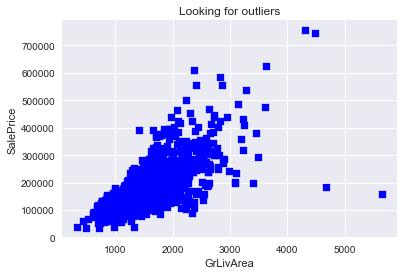

In [6]:
# Plotting scatter plot of the two variables
plt.scatter(housetrain.GrLivArea, housetrain.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

As we can see, we have four outliers. Two houses that sold for far less than they should have based on the square footage, and two that sold for far more than the average. It was decided, based discussions and advice from the project brief on Kaggle to remove house that have a square footage of more than 4000 feet. This is a removal of 4 data points.

In [7]:
housetrain = housetrain[housetrain.GrLivArea < 4000]

In [8]:
# Graphing missing data
group = housetrain.columns.to_series().groupby(housetrain.dtypes).groups # grouping columns by type
groups={k.name: v for k, v in group.items()} #  creating as dictionary

# Taking only the object type col names
objects=housetrain[groups['object'].values]
#print(objects.head(5))
# Printing freqiency counts
for i in objects.columns:
        #print('{} \n' .format(objects[i]))
        print(objects[i].value_counts())
        print('\n')

20     536
60     295
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


RL         1147
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1450
Grvl       6
Name: Street, dtype: int64


None    1365
Grvl      50
Pave      41
Name: Alley, dtype: int64


Reg    925
IR1    481
IR2     41
IR3      9
Name: LotShape, dtype: int64


Lvl    1309
Bnk      61
HLS      50
Low      36
Name: LandContour, dtype: int64


AllPub    1455
NoSeWa       1
Name: Utilities, dtype: int64


Inside     1051
Corner      260
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Gtl    1378
Mod      65
Sev      13
Name: LandSlope, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawf

As we can observe, there are over a dozen varaibles that have more than 5 distinct values. There will be a lot of work involved in completing this recoding. Below find the list of variables, how we rocoded and why. If a variable is not listed, it was deemed that no changes were necessary to the variable.

* MSSubClass: Complex - Requires Specilised case
*     MSZoning: Complex - Requires Specilised case
*     LotShape: Grouped the irregular options together to create more balanced variable
*     LandContour: Changed to binary in order to create a more balanced variable
*     LotConfig: Grouped Frontage together to create a more balanced variable
*     Neighborhood: Complex - Requires Specilised case
*     Condition1: Grouped railrowad and positive features to create a more balanced variable
*     Condition2: Grouped railrowad and positive features to create a more balanced variable
*     HouseStyle: Grouped 1 story and 1.5 story together, 2 story+ together to reduce number of distinct values
*     OverallQual: Recoded to reduce number of distinct values/add numerical order
*     OverallCond: Recoded to reduce number of distinct values/add numerical order
*     RoofStyle: Regrouped everything not Gable or Hip to other to create more balanced variable
*     RoofMatl: Made binary of standard vs not standard to reduce number of distinct values
*     Exterior1st: Complex - Requires Specilised case
*     Exterior2nd: Complex - Requires Specilised case
*     ExterQual: Recoded to reduce number of distinct values/add numerical order
*     ExterCond: Recoded to reduce number of distinct values/add numerical order
*     Foundation: Grouped non standard to other to reduce number of distinct variables
*     BsmtQual: Recoded to reduce number of distinct values/add numerical order
*     BsmtCond: Recoded to reduce number of distinct values/add numerical order
*     BsmtExposure: Recoded to reduce number of distinct values/add numerical orders
*     BsmtFinType1: Grouped like values together to reduce number of distinct values
*     BsmtFinType2: Grouped like values together to reduce number of distinct values
*     Heating: Grouped Gas together to reduce number of distinct values
*     HeatingQC: Recoded to reduce number of distinct values/add numerical order
*     KitchenQual: Recoded to reduce number of distinct values/add numerical order
*     Functional: Recoded to reduce number of distinct values/add numerical order
*     GarageType: Complex - Requires Specilised case
*     GarageQual: Recoded to reduce number of distinct values/add numerical order
*     GarageCond: Recoded to reduce number of distinct values/add numerical order
*     SaleType: Grouped similar contracts together to reduce number of distinct values
*     SaleCondition: Complex - Requires Specilised case

The next blocks of code execute the above descriptions. We replace all the "Excellent" and "Good" ratings with 3, "Average" with 2 and so on. We group frontage on either 2 side and frontage on 3 sides to just frontage for *LotConfig* and many other changes in order to make the data more manageable, reduce the curse of dimensionaility, and ultimately, create a better model. 

In [9]:
# reg or irreg
housetrain['LotShape']=housetrain['LotShape'].replace(['IR1','IR2','IR3'],'IRReg')
#print(housetrain['LotShape'].value_counts())

# flat or not flat
housetrain['LandContour']=housetrain['LandContour'].replace(['Bnk','HLS','Low'],'NotFlat')
#print(housetrain['LandContour'].value_counts())

# combined frontage
housetrain['LotConfig']=housetrain['LotConfig'].replace(['FR2','FR3'],'Frontage')
#print(housetrain['LotConfig'].value_counts())

# combined rail and pos
housetrain['Condition1']=housetrain['Condition1'].replace(['RRNn','RRAn','RRNe','RRAe'],'Rail')
housetrain['Condition1']=housetrain['Condition1'].replace(['PosN','PosA'],'Pos')
#print(housetrain['Condition1'].value_counts())

# combined rail and pos
housetrain['Condition2']=housetrain['Condition2'].replace(['RRNn','RRAn','RRNe','RRAe'],'Rail')
housetrain['Condition2']=housetrain['Condition2'].replace(['PosN','PosA'],'Pos')
#print(housetrain['Condition2'].value_counts())

# Recoding to have less options and grouping similar
housetrain['ExterQual']=housetrain['ExterQual'].replace(['Ex','Gd'],'Above Average')
housetrain['ExterQual']=housetrain['ExterQual'].replace(['Fa','Po'],'Below Average')
#print(housetrain['ExterQual'].value_counts())

# Recoding to have less options and grouping similar
housetrain['ExterCond']=housetrain['ExterCond'].replace(['Ex','Gd'],'Above Average')
housetrain['ExterCond']=housetrain['ExterCond'].replace(['Fa','Po'],'Below Average')
#print(housetrain['ExterCond'].value_counts())

housetrain['HouseStyle']=housetrain['HouseStyle'].replace(['1Story','1.5Unf','1.5Fin'],'1to2Story')
housetrain['HouseStyle']=housetrain['HouseStyle'].replace(['2Story','2.5Unf','2.5Fin'],'2+Story')
#print(housetrain['HouseStyle'].value_counts())

housetrain['RoofStyle']=housetrain['RoofStyle'].replace(['Flat','Gambrel','Mansard','Shed'],'Other')
#print(housetrain['RoofStyle'].value_counts())

housetrain['RoofMatl']=housetrain['RoofMatl'].replace(['ClyTile','Membran','Metal','Roll','Tar&Grv','WdShake','WdShngl'],'Other')
#print(housetrain['RoofMatl'].value_counts())

# Recoding to have less options and grouping similar
housetrain['SaleType']=housetrain['SaleType'].replace(['WD','CWD','VWD'],'Warrenty Deed')
housetrain['SaleType']=housetrain['SaleType'].replace(['Con','ConLw','ConLI','ConLD'],'Contract')
#print(housetrain['SaleType'].value_counts())

# Recoding to have less options and grouping similar
housetrain['GarageCond']=housetrain['GarageCond'].replace(['Ex','Gd'],'Above Average')
housetrain['GarageCond']=housetrain['GarageCond'].replace(['Fa','Po'],'Below Average')
#print(housetrain['GarageCond'].value_counts())

# Recoding to have less options and grouping similar
housetrain['GarageQual']=housetrain['GarageQual'].replace(['Ex','Gd'],'Above Average')
housetrain['GarageQual']=housetrain['GarageQual'].replace(['Fa','Po'],'Below Average')
#print(housetrain['GarageQual'].value_counts())

# Recoding to have less options and grouping similar
housetrain['Functional']=housetrain['Functional'].replace(['Min1','Min2'],'Min')
housetrain['Functional']=housetrain['Functional'].replace(['Maj1','Maj2','Sev','Sal'],'Maj')
#print(housetrain['Functional'].value_counts())

# Recoding to have less options and grouping similar
housetrain['KitchenQual']=housetrain['KitchenQual'].replace(['Ex','Gd'],'Above Average')
housetrain['KitchenQual']=housetrain['KitchenQual'].replace(['Fa','Po'],'Below Average')
#print(housetrain['KitchenQual'].value_counts())

# Recoding to have less options and grouping similar
housetrain['HeatingQC']=housetrain['HeatingQC'].replace(['Ex','Gd'],'Above Average')
housetrain['HeatingQC']=housetrain['HeatingQC'].replace(['Fa','Po'],'Below Average')
#print(housetrain['HeatingQC'].value_counts())

# Merging Gas
housetrain['Heating']=housetrain['Heating'].replace(['GasA','GasW'],'Gas')
#print(housetrain['Heating'].value_counts())

# Recoding to have less options and grouping similar
housetrain['BsmtFinType2']=housetrain['BsmtFinType2'].replace(['ALQ','Rec'],'Average')
housetrain['BsmtFinType2']=housetrain['BsmtFinType2'].replace(['BLQ','LwQ'],'Below Average')
#print(housetrain['BsmtFinType2'].value_counts())

# Recoding to have less options and grouping similar
housetrain['BsmtFinType1']=housetrain['BsmtFinType1'].replace(['ALQ','Rec'],'Average')
housetrain['BsmtFinType1']=housetrain['BsmtFinType1'].replace(['BLQ','LwQ'],'Below Average')
#print(housetrain['BsmtFinType1'].value_counts())

# Recoding to have less options and grouping similar
housetrain['BsmtCond']=housetrain['BsmtCond'].replace(['Ex','Gd'],'Above Average')
housetrain['BsmtCond']=housetrain['BsmtCond'].replace(['Fa','Po'],'Below Average')
#print(housetrain['BsmtCond'].value_counts())

# Recoding to have less options and grouping similar
housetrain['BsmtQual']=housetrain['BsmtQual'].replace(['Ex','Gd'],'Above Average')
housetrain['BsmtQual']=housetrain['BsmtQual'].replace(['Fa','Po'],'Below Average')
#print(housetrain['BsmtQual'].value_counts())

# Foundation: One of the more standard options or other
housetrain['Foundation']=housetrain['Foundation'].replace(['BrkTil','Slab','Stone','Wood'],'Other')
#print(housetrain['Foundation'].value_counts())
group = housetrain.columns.to_series().groupby(housetrain.dtypes).groups # grouping columns by type
groups={k.name: v for k, v in group.items()} #  creating as dictionary

# Taking only the object type col names
objects=housetrain[groups['object'].values]
for i in objects.columns:
        #print('{} \n' .format(objects[i]))
        print(objects[i].value_counts())
        print('\n')

20     536
60     295
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


RL         1147
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1450
Grvl       6
Name: Street, dtype: int64


None    1365
Grvl      50
Pave      41
Name: Alley, dtype: int64


Reg      925
IRReg    531
Name: LotShape, dtype: int64


Lvl        1309
NotFlat     147
Name: LandContour, dtype: int64


AllPub    1455
NoSeWa       1
Name: Utilities, dtype: int64


Inside      1051
Corner       260
CulDSac       94
Frontage      51
Name: LotConfig, dtype: int64


Gtl    1378
Mod      65
Sev      13
Name: LandSlope, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     39
Timber

In [10]:
# Encode some categorical features as ordered numbers when there is information in the order
housetrain = housetrain.replace({"BsmtCond" : {"No" : 0, "Below Average" : 1, "TA" : 2, "Above Average":3},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                        "Fence":{"GdPrv":2,"GdWo":2,"MnPrv":1,"MnWw":1,"No":0},
                        "LotShape":{"IRReg":0,"Reg":1},
                        "CentralAir":{"N":0,"Y":1},
                        "LandContour":{"NotFlat":0,"Lvl":1},
                        "PavedDrive":{"N":0,"Y":1,"P":1},
                       "BsmtQual" : {"No" : 0, "Below Average" : 1, "TA" : 2, "Above Average":3},
                       "ExterCond" : {"Below Average" : 1, "TA" : 2, "Above Average":3},
                       "ExterQual" : {"Below Average" : 1, "TA" : 2, "Above Average":3},
                       "BsmtFinType1":{"No":0,"Unf":1,"Below Average":1,"Average":2,"GLQ":3},
                        "BsmtFinType2":{"No":0,"Unf":1,"Below Average":1,"Average":2,"GLQ":3},
                       "Functional" : {"Maj" : 1, "Mod" : 2, "Min" : 3, "Typ" : 4},
                       "GarageCond" : {"No" : 0, "Below Average" : 1, "TA" : 2, "Above Average":3},
                       "GarageQual" : {"No" : 0, "Below Average" : 1, "TA" : 2, "Above Average":3},
                       "HeatingQC" : {"Below Average" : 1, "TA" : 2, "Above Average":3},
                       "KitchenQual" : {"Below Average" : 1, "TA" : 2, "Above Average":3},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3}}
                     )

# Create new features
# 1* Simplifications of existing features
housetrain["OverallQual"] = housetrain.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
housetrain["OverallCond"] = housetrain.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })



group = housetrain.columns.to_series().groupby(housetrain.dtypes).groups # grouping columns by type
groups={k.name: v for k, v in group.items()} #  creating as dictionary

# Taking only the object type col names
objects=housetrain[groups['object'].values]
for i in objects.columns:
        #print('{} \n' .format(objects[i]))
        print(objects[i].value_counts())
        print('\n')

20     536
60     295
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


RL         1147
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1450
Grvl       6
Name: Street, dtype: int64


None    1365
Grvl      50
Pave      41
Name: Alley, dtype: int64


AllPub    1455
NoSeWa       1
Name: Utilities, dtype: int64


Inside      1051
Corner       260
CulDSac       94
Frontage      51
Name: LotConfig, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     39
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [11]:
int64=housetrain[groups['int64'].values]
for i in int64.columns:
        #print('{} \n' .format(objects[i]))
        print(int64[i].value_counts())
        print('\n')

1460    1
478     1
480     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
494     1
495     1
496     1
497     1
498     1
479     1
477     1
500     1
476     1
457     1
458     1
459     1
460     1
461     1
       ..
995     1
996     1
997     1
998     1
999     1
1000    1
1001    1
982     1
981     1
980     1
969     1
961     1
962     1
963     1
964     1
965     1
966     1
967     1
968     1
970     1
979     1
971     1
972     1
973     1
974     1
975     1
976     1
977     1
978     1
1       1
Name: Id, Length: 1456, dtype: int64


7200     25
9600     24
6000     17
9000     14
8400     14
10800    14
1680     10
7500      9
9100      8
8125      8
6120      8
6240      8
3182      7
7800      6
8450      6
4500      5
10400     5
5400      5
10140     5
9750      5
10000     5
5000      5
4435      5
8544      4
9375      4
6600      4
8640      4
7000      4
11700     4
852



2    735
3    682
1     39
Name: KitchenQual, dtype: int64


6     402
7     329
5     275
8     187
4      97
9      75
10     45
11     17
3      17
12     10
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64


4    1356
3      65
1      20
2      15
Name: Functional, dtype: int64


0    690
1    649
2    113
3      4
Name: Fireplaces, dtype: int64


2    823
1    369
3    178
0     81
4      5
Name: GarageCars, dtype: int64


0       81
440     49
576     47
240     38
484     34
528     33
288     27
400     25
264     24
480     24
308     20
420     19
280     16
672     15
504     12
216     12
352     12
336     12
360     11
564     11
540     10
300     10
462     10
572     10
539      9
384      9
312      9
286      9
660      9
180      9
        ..
406      1
405      1
404      1
582      1
898      1
843      1
671      1
435      1
673      1
459      1
458      1
675      1
825      1
455      1
1356     1
844      1
682      1
889      1
890      1
683      1
4

In [12]:
housetrain['BsmtFinSF']=housetrain['BsmtFinSF1']+housetrain['BsmtFinSF2']
housetrain['PorchSF']=housetrain['OpenPorchSF']+housetrain['EnclosedPorch']+housetrain['3SsnPorch']+housetrain['ScreenPorch']


## Normalising
Most statistical methods (the parametric methods) include the assumption that the sample is drawn from a population where the values have a Normal distribution. One of the first steps of statistical analysis of your data is therefore to check the distribution of the different variables.

Upon completing the task of dealing with missing values and errors in the data, it was decided to move on to normalizing our data.

The Normal distribution is symmetrical, not very peaked or very flat-topped, and if we exam the charts below we can see that our data is often skewed.

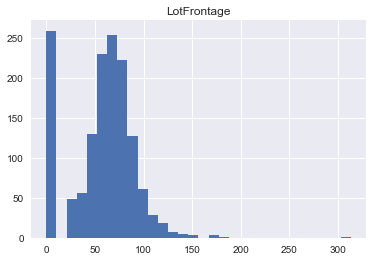

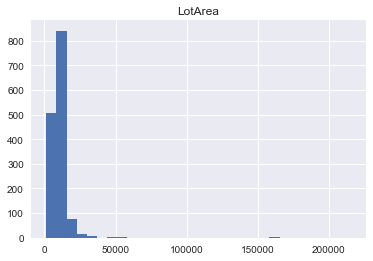

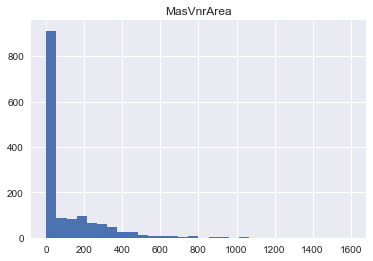

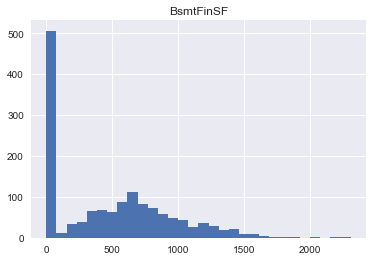

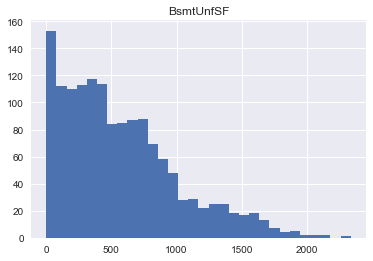

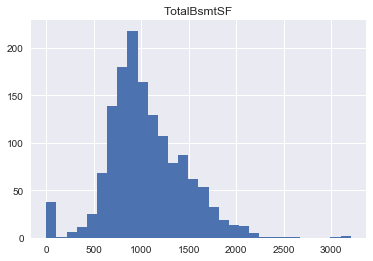

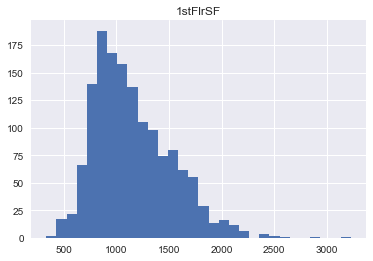

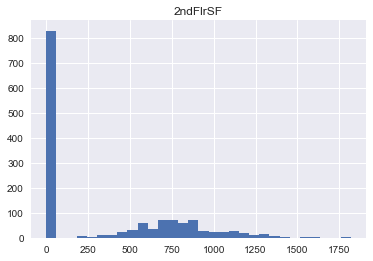

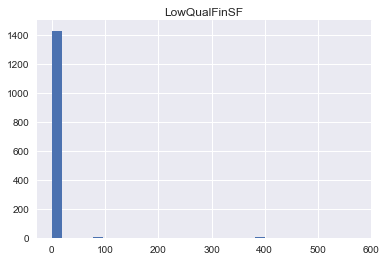

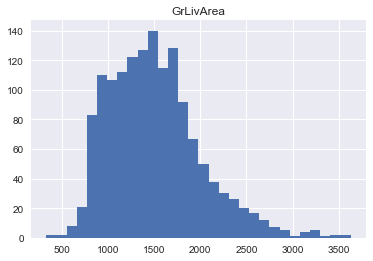

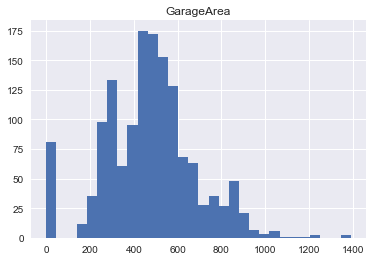

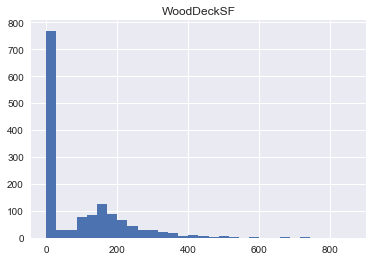

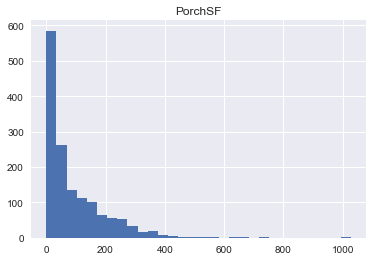

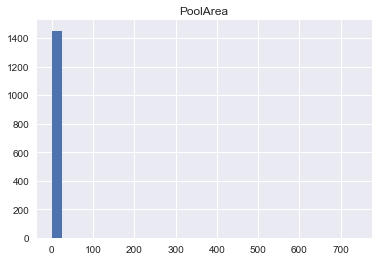

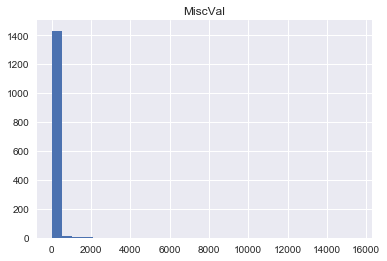

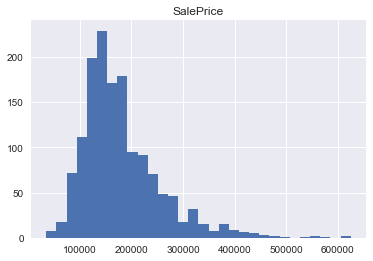

In [13]:
# Printing plots for int 64 and float64
# #quantvar = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
#             'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
#             'Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea'
#            ,'MiscVal','SalePrice']
quantvar = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
            'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','PorchSF','PoolArea'
           ,'MiscVal','SalePrice']
cont_plot=housetrain[quantvar]
for i in range(len(cont_plot.columns)):
        plt.hist(cont_plot.iloc[:,i].dropna(),bins=30)
        plt.title('%s' % cont_plot.columns[i])
        plt.show()


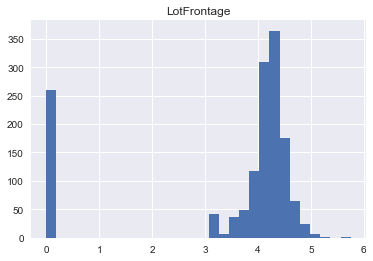

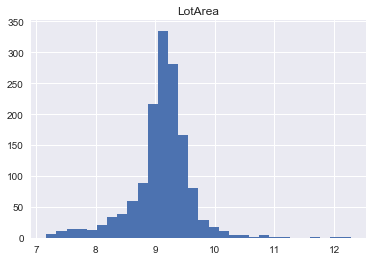

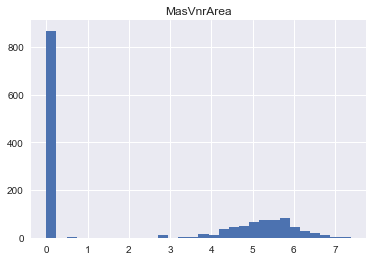

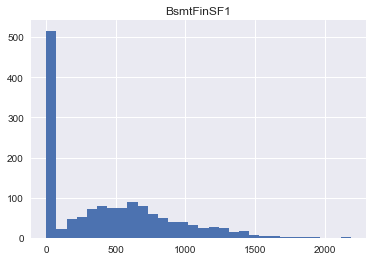

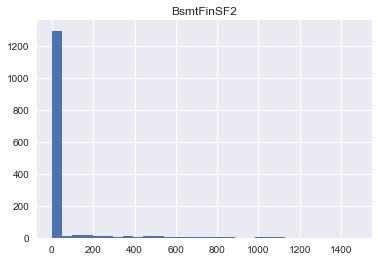

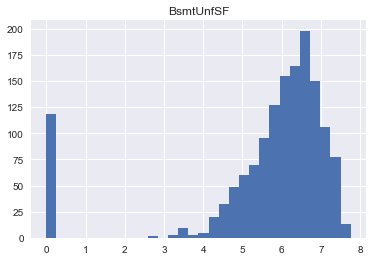

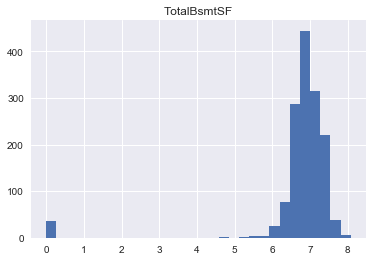

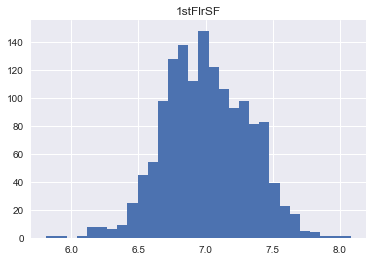

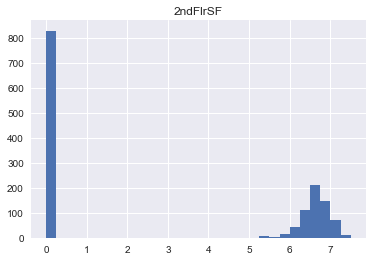

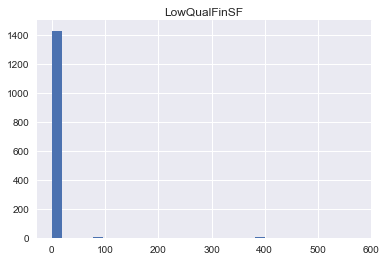

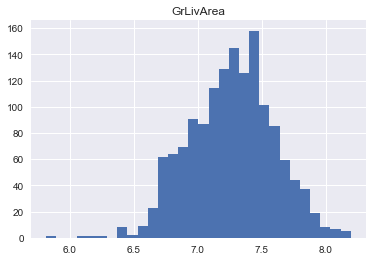

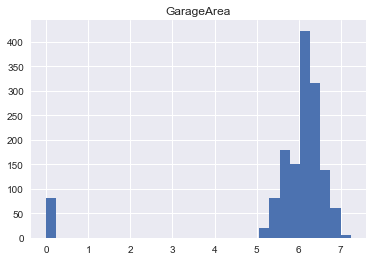

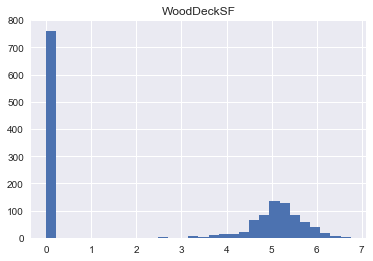

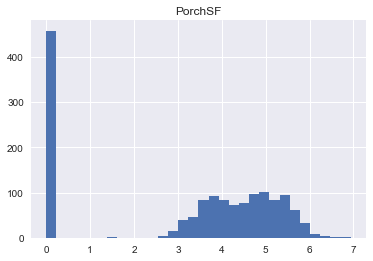

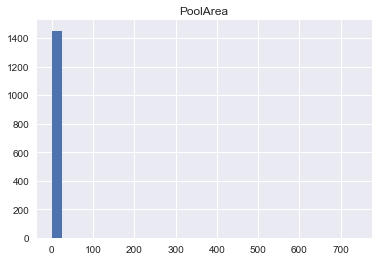

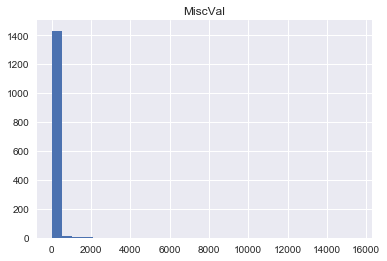

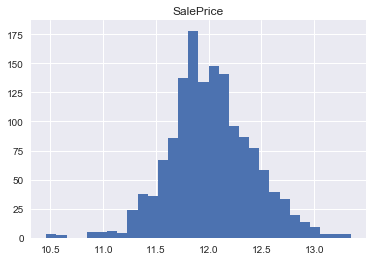

In [14]:
def log_transform(feature):
    housetrain[feature] = np.log1p(housetrain[feature].values) # does a log transform on x+1

#log transforming variables
log_transform('GrLivArea')
log_transform('PorchSF')
log_transform('1stFlrSF')
log_transform('2ndFlrSF')
log_transform('BsmtUnfSF')
log_transform('BsmtFinSF')
log_transform('TotalBsmtSF')
log_transform('LotArea')
log_transform('LotFrontage')
log_transform('KitchenAbvGr')
log_transform('GarageArea')
log_transform('MasVnrArea')
log_transform('WoodDeckSF')
log_transform('OpenPorchSF')
log_transform('SalePrice')
quantvar = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
            'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','PorchSF','PoolArea'
           ,'MiscVal','SalePrice']
cont_plot=housetrain[quantvar]
for i in range(len(cont_plot.columns)):
        plt.hist(cont_plot.iloc[:,i].dropna(),bins=30)
        plt.title('%s' % cont_plot.columns[i])
        plt.show()
# f = pd.melt(housetrain, value_vars=quantitative)
# g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
# g = g.map(sns.distplot, "value")

As we can see, using a log transformation we have normalised our data (excluding the zero values representing missing) and have tidied up the outliers.

# Standardising


In [15]:
housetrain.describe()

,Id,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SalePrice,BsmtFinSF,PorchSF
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.00000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1375.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,729.967033,3.456303,9.107632,0.635302,0.899038,2.937500,2.356456,2.184066,1971.18544,1984.819368,2.112089,2.358516,2.082418,2.429945,1.961538,0.650412,1.785714,436.991071,1.043269,46.677198,5.646361,6.746885,2.637363,0.934753,7.005663,2.852287,5.860577,7.265221,0.423764,0.057005,1.561813,0.381181,2.864698,0.711724,2.441621,6.506181,3.893544,0.609203,1978.440000,1.764423,5.805245,1.865385,1.867445,0.938187,2.448979,2.301153,22.014423,3.418956,15.102335,2.055632,0.269918,43.608516,6.326236,2007.817308,12.021950,4.316212,3.106676
std,421.722909,1.637939,0.513351,0.481511,0.301381,0.276593,0.513729,0.439204,30.20159,20.652143,2.623183,0.499384,0.339911,0.667793,0.420968,1.034478,0.887927,430.255052,0.336011,161.522376,1.855994,1.144962,0.547740,0.247046,0.313046,3.289411,48.688904,0.327737,0.517420,0.237786,0.547683,0.502533,0.815800,0.089385,0.548060,1.611800,0.445288,0.640359,24.692738,0.746215,1.456006,0.501280,0.491451,0.240899,2.595194,2.150232,61.192248,29.357056,55.828405,35.383772,0.593737,496.799265,2.698356,1.329394,0.396077,3.044292,2.212100
min,1.000000,0.000000,7.170888,0.000000,0.000000,1.000000,1.000000,1.000000,1872.00000,1950.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.814131,0.000000,0.000000,5.814131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271,0.000000,0.000000
25%,364.750000,3.761200,8.927944,0.000000,1.000000,3.000000,2.000000,2.000000,1954.00000,1966.750000,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5.409404,6.679599,2.000000,1.000000,6.783325,0.000000,0.000000,7.029088,0.000000,0.000000,1.000000,0.000000,2.000000,0.693147,2.000000,5.000000,4.000000,0.000000,1961.000000,1.000000,5.800603,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.774528,0.000000,0.000000
50%,730.500000,4.158883,9.155831,1.000000,1.000000,3.000000,2.000000,2.000000,1972.00000,1993.500000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,381.000000,1.000000,0.000000,6.170651,6.899219,3.000000,1.000000,6.991177,0.000000,0.000000,7.285849,0.000000,0.000000,2.000000,0.000000,3.000000,0.693147,2.000000,6.000000,4.000000,1.000000,1980.000000,2.000000,6.172743,2.000000,2.000000,1.000000,0.000000,3.218876,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512,6.142037,3.891820
75%,1094.250000,4.382027,9.357811,1.000000,1

In [16]:
import scipy.stats as st
def standard(data,method):
    """Standarising data using various methods.
    
    Method 1 is MinMax scaling 
    Method 2 is decimal
    Method 3 is Z score
    Version Control:
    Initial coding
    ------------------------------------------
    Date 4-Feb-18, Author: Conor Feeney, Desc: Initial Coding
    """
    if method == 1:
        X_std = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
        data = X_std * (1 - 0) + 0
        return data
    elif method==2:
        data = (data)/(10**len(str(int(max(data)))))
        return data
    elif method ==3:
        data = (data - data.mean(axis=0))/data.std(axis=0)
        data=st.norm.cdf(data)
        return data
    elif method==4:
        return data
    
for i in range(len(housetrain.columns)):     
    if housetrain.iloc[:,i].dtype !=object:   
        housetrain.iloc[:,i]=standard(housetrain.iloc[:,i],3)
housetrain.describe()

C:\Users\conor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\conor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\conor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


,Id,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SalePrice,BsmtFinSF,PorchSF
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1.456000e+03,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1.456000e+03,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1.456000e+03,1456.000000,1456.000000,1.456000e+03,1456.000000,1375.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,0.499960,0.556345,0.513281,0.526844,0.567605,5.578268e-01,0.482983,0.460007,0.518062,0.520313,0.477213,0.478646,0.456787,0.521750,0.526206,0.455235,0.489104,0.478420,0.469908,0.443175,0.551491,5.447160e-01,0.537109,0.564738,0.498201,0.485697,0.461625,0.502850,0.480552,0.438352,0.503801,0.473656,0.500511,4.441888e-01,0.502421,0.485132,5.546457e-01,0.485117,0.518936,0.511587,0.557376,0.556878,0.559110,0.564092,0.492805,0.502282,0.439575,0.462476,0.440185,0.478633,0.441874,0.479069,0.492264,0.497156,0.495400,0.529651,0.523556
std,0.310983,0.260035,0.246158,0.328427,0.189798,1.326918e-01,0.319705,0.262970,0.299295,0.315327,0.327929,0.322924,0.190805,0.289349,0.159514,0.288466,0.316728,0.298836,0.151120,0.166231,0.225258,1.443651e-01,0.299699,0.149235,0.292820,0.337118,0.070863,0.291009,0.327376,0.136357,0.322966,0.323893,0.270128,1.226013e-01,0.324160,0.280062,1.467451e-01,0.305913,0.300537,0.279794,0.165566,0.175709,0.169227,0.144829,0.337430,0.332673,0.201797,0.068552,0.159725,0.030616,0.241340,0.075488,0.289086,0.310906,0.281604,0.320190,0.316138
min,0.041945,0.017423,0.000081,0.093519,0.001427,1.235911e-12,0.004140,0.003510,0.000512,0.045899,0.210363,0.003260,0.000725,0.000137,0.000002,0.264761,0.022157,0.154897,0.000952,0.386297,0.001174,1.900013e-09,0.001398,0.000077,0.000071,0.192940,0.452096,0.000005,0.206395,0.405268,0.002174,0.224070,0.000223,8.433203e-16,0.004264,0.002589,4.065905e-11,0.170714,0.000745,0.009027,0.000033,0.000099,0.000072,0.000049,0.172672,0.142267,0.359514,0.453644,0.393383,0.476836,0.324696,0.465026,0.024198,0.085810,0.000040,0.078124,0.080100
25%,0.193242,0.573835,0.363158,0.093519,0.631186,5.893853e-01,0.243885,0.337575,0.284670,0.190856,0.210363,0.236404,0.404209,0.259843,0.536399,0.264761,0.188109,0.154897,0.448768,0.386297,0.449205,4.765690e-01,0.122288,0.604152,0.238777,0.192940,0.452096,0.235610,0.206395,0.405268,0.152493,0.224070,0.144586,4.176796e-01,0.210182,0.175030,5.944753e-01,0.170714,0.240007,0.152823,0.498728,0.605859,0.606313,0.601254,0.172672,0.142267,0.359514,0.453644,0.393383,0.476836,0.324696,0.465026,0.311537,0.269344,0.266090,0.078124,0.080100
50%,0.500504,0.666017,0.537402,0.775596,0.631186,5.893853e-01,0.243885,0.337575,0.510758,0.662831,0.210363,0.236404,0.404209,0.803348,0.536399,0.264761,0.595351,0.448230,0.448768,0.386297,0.611214,5.529220e-01,0.746034,0.604152,0.481546,0.192940,0.452096,0.525093,0.206395,0.405268,0.788166,0.224070,0.565863,4.176796e-01,0.210182,0.376743,5.944753e-01,0.729161,0.525187,0.623883,0.599635,0.605859,0.606313,0.601254,0.172672,0.665238,0.359514,0.453644,0.393383,0.476836,0.324696,0.465026,0.451884,0.554653,0.479423,0.725665,0.638680
75%,0.806150,0.714023,0.686993,0.775

## Correlation Analysis

Next, we needed to select the predictor variables with low pair-wise correlation values. In order to do this, we used Spearman's correlation test to determine the statistical dependence between the rankings of pairs of variables.

#### Spearman Test

The Spearman's rank-order correlation is the nonparametric version of the Pearson product-moment correlation. Spearman's correlation coefficient, measures the strength and direction of association between two ranked variables. This test has some assumptions. You need two variables that are either ordinal, interval or ratio. Although you would normally hope to use a Pearson product-moment correlation on interval or ratio data, the Spearman correlation can be used when the assumptions of the Pearson correlation are markedly violated. However, Spearman's correlation determines the strength and direction of the monotonic relationship between your two variables rather than the strength and direction of the linear relationship between your two variables, which is what Pearson's correlation determines. A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases.

Below, you can observe the results of our Spearman correlation test.

In [17]:
corr=['SalePrice','LotFrontage','LotArea','LotShape',"BsmtFinType1","BsmtFinType2",'LandSlope','ExterQual','ExterCond','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','GarageQual','GarageCond','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

housetrain[corr].corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

Looking at the above results, we see some expected correlations:
* **SalePrice** is correlated with YearBuilt, OverallQual, BsmtQual,TotalBsmtSF, GrLivArea, FullBath, KitchenQual, GarageCars, GarageArea
* **BsmtFinType1** and **BsmtFinType2** are correlated with BsmtFinSF1 and BsmtFinSF2 respectively
* **ExterQual** is correlated with OverallQual, YearBuilt, YearRemodAdd, BsmtQual, KitchenQual, GarageYrBlt and SalePrice 
* **OverallQual** is correlated with YearBuilt, ExterQual and KitchenQual
* **YearBlt** is correlated with GarageCars, GarageYrBlt, BsmntQual, YearRemodAdd, SalePrice
* **YearRemodAdd** is correlated with YearBuilt, KitchenQual, GarageYrBlt, SalePrice
* **BsmtQual** is correlated with YearBuilt, GarageYrBlt
* **SalePrice** variable is correlated with YearBuilt OverallQual and GRLivArea
* **GarageYrBlt** variable is correlated with YearBuilt, YearRemodAdd, and BsmtQual, and GarageCars
* **1stFlrSF** variable is correlated with TotalBsmtSF
* **TotRmsAbvGrd** variable is correlated with GrLivArea and BedroomAbvGrd
* **GarageArea** variable is correlated with GarageCars
* **GarageCond** variable is correlated with GarageQual
* **BsmtFinSF1** is correlated with BsmtFullBath
* **TotalBsmtSF** is correlated with 1stFlrSF, SalePrice
* **2ndFlrSF** is correlated with GrLivArea, and HalfBath
* **BsmtFullBath** is correlated with BsmtFinSF1
* **FullBath** is correlated with GrLivArea and SalePrice
* **BedroomAbvGr** is correlated with TotalRmsAbvGrd
* **KitchenQual** is correlated with YearRemodAdd, OverallQual, and SalePrice
* **GarageCars** is correlated with YrBuilt, GarageYrBlt, GarageArea, and Sale Price
* **GarageArea** is correlated with Sale Price, Garage Cars

#### ANOVA

Next, for Categorical vs Continuous variables, we used the analysis of variance (ANOVA). ANOVA provides a statistical test of whether or not the means of several groups are equal.

To keep our ANOVA correlations simple, we chose to only analyze our target variable, SalesPrice, against each categorical variable. Below, you can observe the results of our ANOVA correlation tests.

In [ ]:
for i in (['SalePrice']):
    grps = pd.unique(housetrain.Condition1.values)
    d_data = {grp:housetrain[i][housetrain.Condition1 == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Norm'], d_data['Feedr'], d_data['Artery'], d_data['Rail'], d_data['Pos'])
    print('Condition1 v Variable {} Result {}'.format(i,anova))

In [ ]:
for i in (['SalePrice']):
    grps = pd.unique(housetrain.Condition2.values)
    d_data = {grp:housetrain[i][housetrain.Condition2 == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Norm'], d_data['Feedr'], d_data['Artery'], d_data['Rail'], d_data['Pos'])
    print('Condition2 v Variable {} Result {}'.format(i,anova))

In [ ]:
for i in (['SalePrice']):
    grps = pd.unique(housetrain.Foundation.values)
    d_data = {grp:housetrain[i][housetrain.Foundation == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['PConc'], d_data['CBlock'], d_data['Other'])
    print('Foundation v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.Heating.values)
    d_data = {grp:housetrain[i][housetrain.Heating == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Gas'],d_data['Grav'],d_data['Wall'],d_data['OthW'],d_data['Floor'])
    print('Heating v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.HouseStyle.values)
    d_data = {grp:housetrain[i][housetrain.HouseStyle == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['1to2Story'],d_data['2+Story'],d_data['SLvl'],d_data['SFoyer'])
    print('HouseStyle v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.LandContour.values)
    d_data = {grp:housetrain[i][housetrain.LandContour == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Lvl'],d_data['NotFlat'])
    print('LandContour v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.LotConfig.values)
    d_data = {grp:housetrain[i][housetrain.LotConfig == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Inside'],d_data['Corner'],d_data['CulDSac'],d_data['Frontage'])
    print('LotConfig v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.RoofMatl.values)
    d_data = {grp:housetrain[i][housetrain.RoofMatl == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['CompShg'],d_data['Other'])
    print('RoofMatl v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.RoofStyle.values)
    d_data = {grp:housetrain[i][housetrain.RoofStyle == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Gable'],d_data['Hip'],d_data['Other'])
    print('RoofStyle v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.SaleType.values)
    d_data = {grp:housetrain[i][housetrain.SaleType == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Warrenty Deed'],d_data['New'],d_data['COD'],d_data['Contract'],d_data['Oth'])
    print('SaleType v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.MSZoning.values)
    d_data = {grp:housetrain[i][housetrain.MSZoning == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['RL'],d_data['RM'],d_data['FV'],d_data['RH'],d_data['C (all)'])
    print('MSZoning v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.Street.values)
    d_data = {grp:housetrain[i][housetrain.Street == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Pave'],d_data['Grvl'])
    print('Street v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.Alley.values)
    d_data = {grp:housetrain[i][housetrain.Alley == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['None'],d_data['Grvl'],d_data['Pave'])
    print('Alley v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.Utilities.values)
    d_data = {grp:housetrain[i][housetrain.Utilities == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['NoSeWa'],d_data['AllPub'])
    print('Utilities v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.CentralAir.values)
    d_data = {grp:housetrain[i][housetrain.CentralAir == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Y'],d_data['N'])
    print('CentralAir v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.Electrical.values)
    d_data = {grp:housetrain[i][housetrain.Electrical == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['SBrkr'],d_data['FuseA'],d_data['FuseF'],d_data['FuseP'],d_data['Mix'])
    print('Electrical v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.BldgType.values)
    d_data = {grp:housetrain[i][housetrain.BldgType == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['1Fam'],d_data['TwnhsE'],d_data['Duplex'],d_data['Twnhs'],d_data['2fmCon'])
    print('BldgType v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.OverallQual.values)
    d_data = {grp:housetrain[i][housetrain.OverallQual == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data[1],d_data[2],d_data[3])
    print('OverallQual v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.OverallCond.values)
    d_data = {grp:housetrain[i][housetrain.OverallCond == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data[1],d_data[2],d_data[3])
    print('OverallCond v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.GarageCars.values)
    d_data = {grp:housetrain[i][housetrain.GarageCars == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data[0],d_data[1],d_data[2],d_data[3],d_data[4])
    print('GarageCars v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.MasVnrType.values)
    d_data = {grp:housetrain[i][housetrain.MasVnrType == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['BrkFace'],d_data['Stone'],d_data['BrkCmn'])
    print('MasVnrType v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.FireplaceQu.values)
    d_data = {grp:housetrain[i][housetrain.FireplaceQu == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Gd'],d_data['TA'],d_data['Fa'],d_data['Ex'],d_data['Po'])
    print('FireplaceQu v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.GarageType.values)
    d_data = {grp:housetrain[i][housetrain.GarageType == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Attchd'],d_data['Detchd'],d_data['BuiltIn'],d_data['No'],d_data['Basment'],d_data['CarPort'],d_data['2Types'])
    print('GarageType v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.GarageFinish.values)
    d_data = {grp:housetrain[i][housetrain.GarageFinish == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Unf'],d_data['RFn'],d_data['Fin'],d_data['No'])
    print('GarageFinish v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.PavedDrive.values)
    d_data = {grp:housetrain[i][housetrain.PavedDrive == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Y'],d_data['N'],d_data['P'])
    print('PavedDrive v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.PoolQC.values)
    d_data = {grp:housetrain[i][housetrain.PoolQC == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Fa'],d_data['Gd'],d_data['Ex'])
    print('PoolQC v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.MiscFeature.values)
    d_data = {grp:housetrain[i][housetrain.MiscFeature == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Shed'],d_data['Gar2'],d_data['Othr'],d_data['TenC'])
    print('MiscFeature v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.SaleCondition.values)
    d_data = {grp:housetrain[i][housetrain.SaleCondition == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Normal'],d_data['Partial'],d_data['Abnorml'],d_data['Family'],d_data['Alloca'],d_data['AdjLand'])
    print('SaleCondition v Variable {} Result {}'.format(i,anova))

In [ ]:
#Should there only be one group??
for i in (['SalePrice']):
    grps = pd.unique(housetrain.SaleCondition.values)
    d_data = {grp:housetrain[i][housetrain.SaleCondition == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Normal'],d_data['Partial'],d_data['Abnorml'],d_data['Family'],d_data['Alloca'],d_data['AdjLand'])
    print('SaleCondition v Variable {} Result {}'.format(i,anova))

# DATA MODELLING PREP

In [18]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

### creating copy
testtrain=pd.DataFrame.copy(housetrain)

# creating and adding dummy variables
dummies = pd.get_dummies(testtrain[groups['object'].values])

# dropping unneeded variables and creating our Y target variable
testrain = testtrain.join(dummies)
testrain=testrain.drop('Id',axis=1)
y=pd.DataFrame.copy(testrain['SalePrice'])
testrain=testrain.drop('SalePrice',axis=1)
testrain=testrain.drop(testrain[groups['object'].values],axis=1)
testrain=testrain.drop('GarageYrBlt',axis=1)
testrain=testrain.drop('OpenPorchSF',axis=1)
testrain=testrain.drop('EnclosedPorch',axis=1)
testrain=testrain.drop('3SsnPorch',axis=1)
testrain=testrain.drop('ScreenPorch',axis=1)
testrain=testrain.drop('BsmtFinSF1',axis=1)
testrain=testrain.drop('BsmtFinSF2',axis=1)


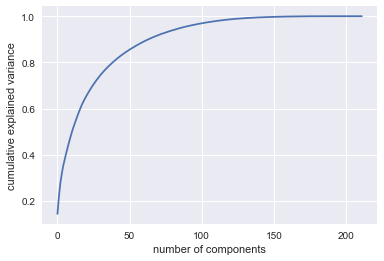

In [19]:
# PCA
from sklearn.decomposition import PCA
pca = PCA().fit(testrain)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [20]:
pca = PCA(n_components=80)
pca.fit(testrain)

PCA(copy=True, iterated_power='auto', n_components=80, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
X_pca = pca.transform(testrain)
print("original shape:   ", testrain.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1456, 212)
transformed shape: (1456, 80)
